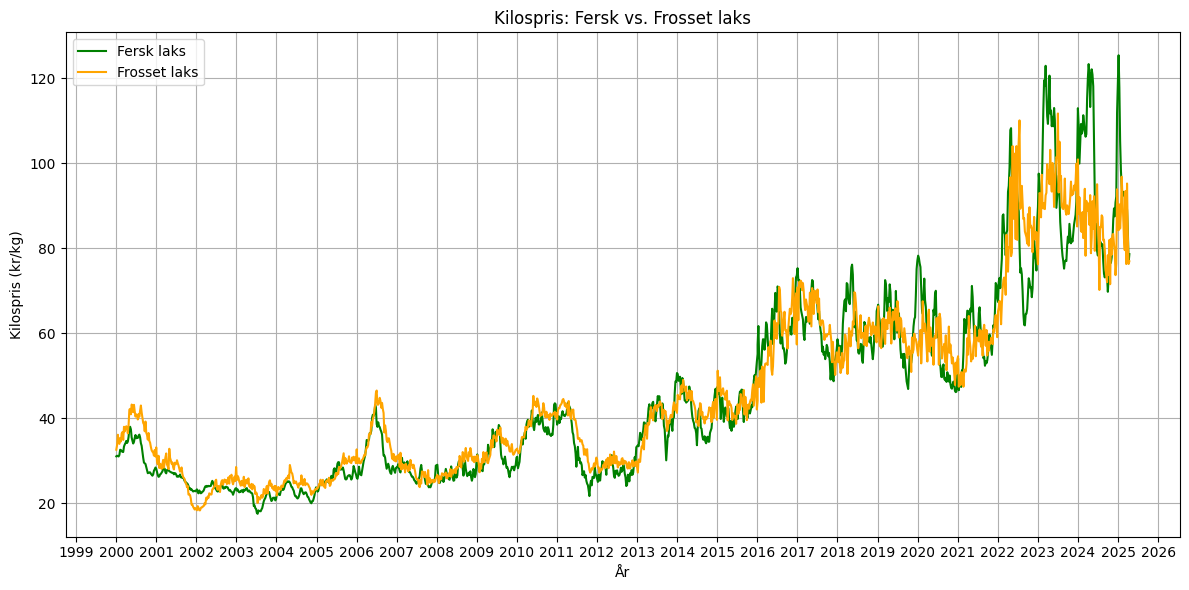

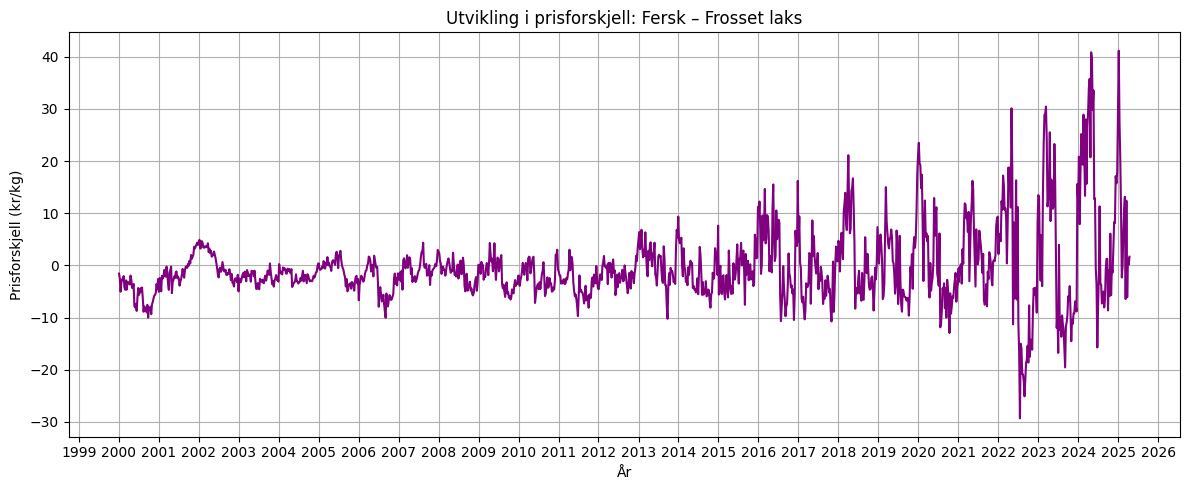


Statistikk per år for fersk laks (kr/kg):
      Gjennomsnitt  Median  Std.avvik
År                                   
2000         32.04   32.33       3.40
2001         25.99   26.45       1.67
2002         23.36   23.38       0.70
2003         21.24   21.75       1.81
2004         22.55   22.42       1.36
2005         26.17   25.98       1.70
2006         32.41   30.92       5.14
2007         26.68   26.48       1.87
2008         27.02   26.81       1.48
2009         30.96   30.08       3.26
2010         37.28   37.86       3.44
2011         32.99   31.40       6.94
2012         27.67   27.55       1.79
2013         39.76   39.78       4.28
2014         41.35   41.90       5.05
2015         42.82   42.28       3.53
2016         60.24   59.23       5.53
2017         61.30   62.14       6.97
2018         61.22   58.91       5.97
2019         60.86   61.20       7.18
2020         57.55   55.98       9.46
2021         59.13   59.59       6.18
2022         80.76   77.88      12.18
2023   

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Henter eksportdata fra SSB (tabell 03024)
def hent_eksportdata():
    url = "https://data.ssb.no/api/v0/no/table/03024/"
    query = {
        "query": [],
        "response": {"format": "json-stat2"}
    }
    r = requests.post(url, json=query)
    data = r.json()

    from itertools import product
    dims = list(data["dimension"].keys())
    values = data["value"]
    dim_vals = [list(data["dimension"][d]["category"]["label"].values()) for d in dims]
    combos = list(product(*dim_vals))
    df = pd.DataFrame(combos, columns=dims)
    df["Value"] = values
    df_pivot = df.pivot_table(index="Tid", columns=["VareGrupper2", "ContentsCode"],
                               values="Value", aggfunc="sum").reset_index()
    df_pivot.columns = ["År og ukenr.", "Fersk laks - Kilospris", "Fersk laks - Vekt (tonn)",
                        "Frosset laks - Kilospris", "Frosset laks - Vekt (tonn)"]
    df_pivot["UkeID"] = df_pivot["År og ukenr."].str.replace("U", "-")
    return df_pivot

# 2. Sammenligning og utvikling i prisforskjell
def analyser_fersk_vs_frosset_plot():
    df = hent_eksportdata()
    df = df.dropna()

    # Konverter ukeID til mandagsdato i hver uke
    df["UkeDato"] = pd.to_datetime(df["UkeID"] + "-1", format="%Y-%W-%w")

    # ----------- 1. Plot: Sammenligning av prisene for fersk og frosset laks -----------
    plt.figure(figsize=(12, 6))
    plt.plot(df["UkeDato"], df["Fersk laks - Kilospris"], label="Fersk laks", color="green")
    plt.plot(df["UkeDato"], df["Frosset laks - Kilospris"], label="Frosset laks", color="orange")
    plt.xlabel("År")
    plt.ylabel("Kilospris (kr/kg)")
    plt.title("Kilospris: Fersk vs. Frosset laks")
    plt.legend()
    plt.grid(True)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.tight_layout()
    plt.show()

    # ----------- 2. Plot: Prisforskjell mellom fersk og frosset laks -----------
    df["Prisforskjell"] = df["Fersk laks - Kilospris"] - df["Frosset laks - Kilospris"]

    plt.figure(figsize=(12, 5))
    plt.plot(df["UkeDato"], df["Prisforskjell"], color="purple")
    plt.xlabel("År")
    plt.ylabel("Prisforskjell (kr/kg)")
    plt.title("Utvikling i prisforskjell: Fersk – Frosset laks")
    plt.grid(True)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.tight_layout()
    plt.show()

# 3. Statistikk for Fersk og Frosset laks
def statistikk_per_år():
    df = hent_eksportdata()
    df = df.dropna()

    # Konverter ukeID til mandag i hver uke
    df["UkeDato"] = pd.to_datetime(df["UkeID"] + "-1", format="%Y-%W-%w")

    # Sørge for at "År" kolonnen er riktig
    df["År"] = df["UkeDato"].dt.year

    # Statistikk for Fersk laks
    gjennomsnitt_fersk = df["Fersk laks - Kilospris"].mean()
    median_fersk = df["Fersk laks - Kilospris"].median()
    stdavvik_fersk = df["Fersk laks - Kilospris"].std()
    maks_fersk = df["Fersk laks - Kilospris"].max()
    min_fersk = df["Fersk laks - Kilospris"].min()

    print("\nStatistikk for fersk laks (Kilospris):")
    print(f"Gjennomsnitt:    {gjennomsnitt_fersk:.2f} kr/kg")
    print(f"Median:          {median_fersk:.2f} kr/kg")
    print(f"Standardavvik:   {stdavvik_fersk:.2f} kr/kg")
    print(f"Største pris:    {maks_fersk:.2f} kr/kg")
    print(f"Minste pris:     {min_fersk:.2f} kr/kg")

    # Statistikk for Frosset laks
    gjennomsnitt_frosset = df["Frosset laks - Kilospris"].mean()
    median_frosset = df["Frosset laks - Kilospris"].median()
    stdavvik_frosset = df["Frosset laks - Kilospris"].std()
    maks_frosset = df["Frosset laks - Kilospris"].max()
    min_frosset = df["Frosset laks - Kilospris"].min()

    print("\nStatistikk for frosset laks (Kilospris):")
    print(f"Gjennomsnitt:    {gjennomsnitt_frosset:.2f} kr/kg")
    print(f"Median:          {median_frosset:.2f} kr/kg")
    print(f"Standardavvik:   {stdavvik_frosset:.2f} kr/kg")
    print(f"Største pris:    {maks_frosset:.2f} kr/kg")
    print(f"Minste pris:     {min_frosset:.2f} kr/kg")

# 4. Statistikk per år for fersk og frosset laks
def statistikk_per_år():
    df = hent_eksportdata()
    df = df.dropna()

    # Konverter ukeID til mandagsdato i hver uke
    df["UkeDato"] = pd.to_datetime(df["UkeID"] + "-1", format="%Y-%W-%w")

    # Kalkuler prisforskjell
    df["Prisforskjell"] = df["Fersk laks - Kilospris"] - df["Frosset laks - Kilospris"]

    # Sørge for at "År" kolonnen er riktig
    df["År"] = df["UkeDato"].dt.year

    stats_fersk_år = df.groupby("År")["Fersk laks - Kilospris"].agg(["mean", "median", "std"]).round(2)
    stats_frosset_år = df.groupby("År")["Frosset laks - Kilospris"].agg(["mean", "median", "std"]).round(2)

    print("\nStatistikk per år for fersk laks (kr/kg):")
    print(stats_fersk_år.rename(columns={"mean": "Gjennomsnitt", "median": "Median", "std": "Std.avvik"}))

    print("\nStatistikk per år for frosset laks (kr/kg):")
    print(stats_frosset_år.rename(columns={"mean": "Gjennomsnitt", "median": "Median", "std": "Std.avvik"}))

# 6. Statistikk per sesong for fersk og frosset laks 
    def finn_sesong(row):
        måned = row.month
        if måned in [3, 4, 5]:
            return "Vår"
        elif måned in [6, 7, 8]:
            return "Sommer"
        elif måned in [9, 10, 11]:
            return "Høst"
        else:
            return "Vinter"

    df["Sesong"] = df["UkeDato"].apply(finn_sesong)

    stats_fersk_sesong = df.groupby("Sesong")["Fersk laks - Kilospris"].agg(["mean", "median", "std"]).round(2)
    stats_frosset_sesong = df.groupby("Sesong")["Frosset laks - Kilospris"].agg(["mean", "median", "std"]).round(2)

    print("\nPrisforskjell per sesong for fersk laks (kr/kg):")
    print(stats_fersk_sesong.rename(columns={"mean": "Gjennomsnitt", "median": "Median", "std": "Std.avvik"}))

    print("\nPrisforskjell per sesong for frosset laks (kr/kg):")
    print(stats_frosset_sesong.rename(columns={"mean": "Gjennomsnitt", "median": "Median", "std": "Std.avvik"}))

if __name__ == "__main__":
    analyser_fersk_vs_frosset_plot()  # For å vise plottene
    statistikk_per_år()  # For å vise statistikken
